In [1]:
import diffusion_imaging
from run_noddi import load_files, fit_model, visualize_result
from dipy.viz import window, actor
from dipy.segment.mask import median_otsu
import numpy as np
import dill

#path = "C:\\Users\\boywi\\OneDrive\\Documents\\SCHOOL\\SJSU\\thesis_data\\021_S_2077\\021_S_2077.pkl"
#path = "C:\\Users\\boywi\\OneDrive\\Documents\\SCHOOL\\SJSU\\thesis_data\\008_4.pkl"
path = "C:\\Users\\boywi\\OneDrive\\Documents\\SCHOOL\\SJSU\\thesis_data\\hcp\\patients\\100307\\100307.pkl"

In [2]:
path = "D:\\Users\\boywi\\Documents\\THESIS_DATA\\HCP\\Diffusion\\100307\\T1w\\Diffusion"

In [3]:
import nipy

In [4]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

In [5]:
from diffusion_imaging.models import NODDIModel

In [6]:
from diffusion_imaging.handlers import make_handler

hcp_handler = make_handler('D:\\Users\\boywi\\Documents\\THESIS_DATA\\HCP\\Diffusion\\100307\\T1w\\Diffusion', 'hcp')
patient = hcp_handler.load()

['D:\\Users\\boywi\\Documents\\THESIS_DATA\\HCP\\Diffusion\\100307\\T1w\\Diffusion\\bvals', 'D:\\Users\\boywi\\Documents\\THESIS_DATA\\HCP\\Diffusion\\100307\\T1w\\Diffusion\\bvecs', 'D:\\Users\\boywi\\Documents\\THESIS_DATA\\HCP\\Diffusion\\100307\\T1w\\Diffusion\\data.nii.gz', 'D:\\Users\\boywi\\Documents\\THESIS_DATA\\HCP\\Diffusion\\100307\\T1w\\Diffusion\\odi_full_mask.nii.gz']


In [7]:
patient.mri.scheme.

In [23]:
patient.mri.data.shape

(145, 174, 145, 288)

In [69]:
mask[:, :, 2]

IndexError: index 2 is out of bounds for axis 2 with size 2

In [31]:
patient.mri.nifti_image.get_affine()

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [11]:
patient.mri.data.shape

(145, 174, 1)

In [20]:
data = patient.mri.pull_axial_middle_slice()
scheme = patient.mri.scheme
_, mask = median_otsu(data[:, :, :, 0])

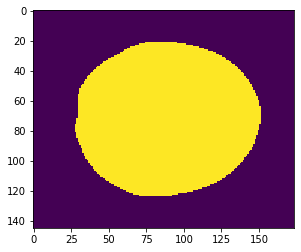

In [24]:
plt.imshow(mask[:, :, 0])

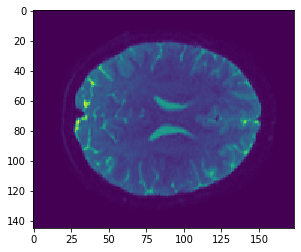

In [25]:
plt.imshow(data[:, :, 0, 0])

In [14]:
data.shape

(145, 174, 1, 288)

In [26]:
model = NODDIModel()
trained_model = model.fit(scheme=scheme, data=data, mask=mask)

Using parallel processing with 12 workers.
Setup brute2fine optimizer in 3.792271375656128 seconds
Fitting of 10047 voxels complete in 217.53097581863403 seconds.
Average of 0.02165133630124754 seconds per voxel.


In [32]:
odi = trained_model.fitted_and_linked_parameters['SD1WatsonDistributed_1_SD1Watson_1_odi']

In [47]:
odi.shape

(145, 174, 1)

In [50]:
145//2

72

In [42]:
odi_out = np.zeros((145, 174, 145))

In [45]:
odi_out[:, :, 72] = odi[:, :, 0]

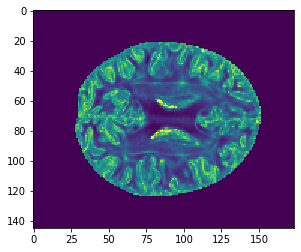

In [46]:
plt.imshow(odi_out[:, :, 72])

In [51]:
odi_path = os.path.join(path, "odi_mask_2.nii.gz")

In [52]:
odi_nii = nib.Nifti1Image(odi_out, patient.mri.nifti_image.get_affine())

In [53]:
nib.save(odi_nii, odi_path)

In [7]:
mask = nib.load(os.path.join(path, "nodif_brain_mask.nii.gz"))
data = nib.load(os.path.join(path, "data.nii.gz"))

In [8]:
data.get_data().shape

(145, 174, 145, 288)

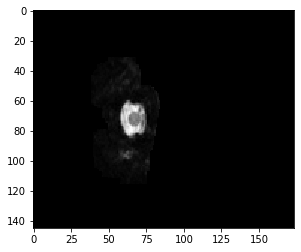

In [110]:
plt.imshow(data[:, :, 9, 0], cmap="Greys_r")

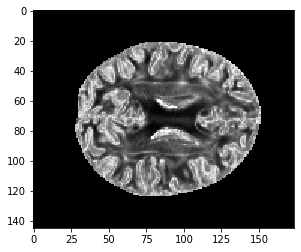

In [29]:
plt.imshow(odi[:,:,0], cmap="Greys_r")

In [20]:
data.shape

(145, 1, 145)

In [8]:
mask.shape

(145, 174, 145)

In [11]:
data.shape

(145, 1, 145)

In [13]:
with open(path, 'rb') as f:
    model = dill.load(f)

In [14]:
type(model)

dmipy.core.fitted_modeling_framework.FittedMultiCompartmentModel

In [15]:
model.fitted_parameters.keys()

dict_keys(['SD1WatsonDistributed_1_SD1Watson_1_mu', 'SD1WatsonDistributed_1_SD1Watson_1_odi', 'SD1WatsonDistributed_1_partial_volume_0', 'partial_volume_0', 'partial_volume_1'])

In [25]:
fitted_parameters = model.fitted_parameters
odi = fitted_parameters['SD1WatsonDistributed_1_SD1Watson_1_odi']
odi_nifti = nib.Nifti1Image(odi, patient.mri.nifti_image.affine)
nib.save(odi_nifti, 'D:\\Users\\boywi\\Documents\\THESIS_DATA\\HCP\\Diffusion\\100307\\T1w\\Diffusion\\odi_full_mask.nii.gz')

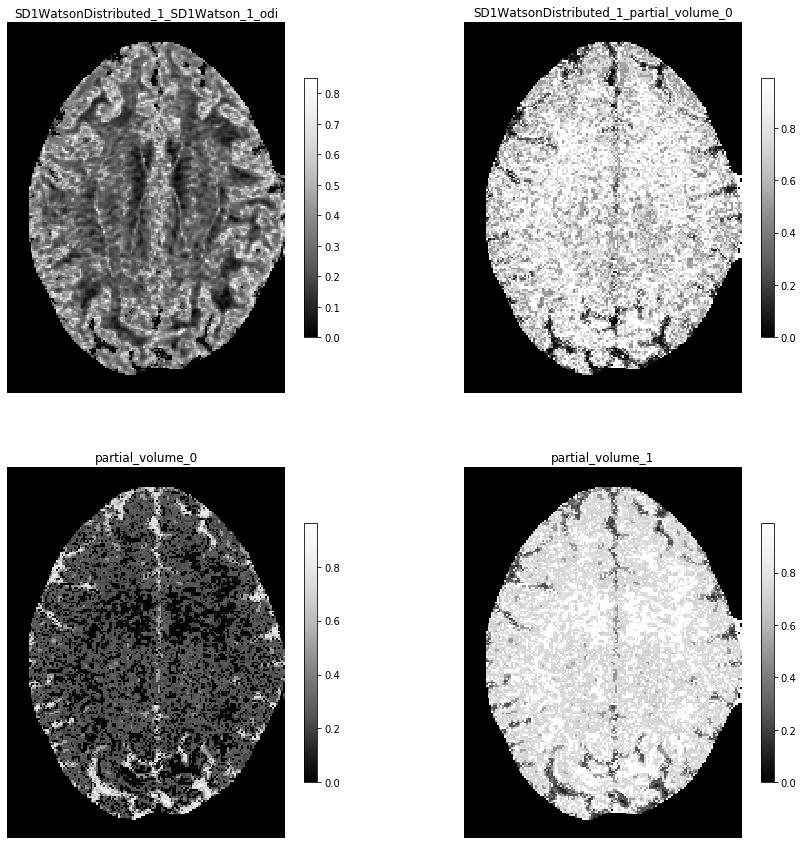

In [37]:
import matplotlib.pyplot as plt

fitted_parameters = model.fitted_parameters

fig, axs = plt.subplots(2, 2, figsize=[15, 15])
axs = axs.ravel()

counter = 0
for name, values in fitted_parameters.items():
    if values.squeeze().ndim != 2:
        continue
    cf = axs[counter].imshow(values.squeeze().T, origin=True, interpolation='nearest', cmap='Greys_r')
    axs[counter].set_axis_off()
    axs[counter].set_title(name)
    fig.colorbar(cf, ax=axs[counter], shrink=0.7)
    counter += 1

In [6]:
from dipy.data import get_sphere
sphere = get_sphere(name = 'symmetric724').subdivide()
fods = model.fod(sphere.vertices, visual_odi_lower_bound=0.08)

In [12]:
import matplotlib.pyplot as plt

In [26]:
import nibabel as nib

In [28]:
img = nib.Nifti1Image(fods[:, :, 0, :], np.eye(4))
img.get_data_dtype()
img.header.get_xyzt_units()

('unknown', 'unknown')

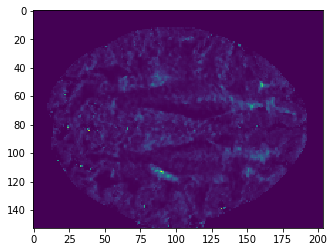

In [23]:
imgplot = plt.imshow(fods[:, :, 0, 1000])

In [7]:
import numpy as np
affine = np.eye(4)
volume_res = fitted_parameters['SD1WatsonDistributed_1_SD1Watson_1_odi']
volume_im = actor.slicer(volume_res[:, :, 0, None], interpolation='nearest', affine=affine, opacity=0.7)

In [8]:

fod_spheres = actor.odf_slicer(
    fods, sphere=sphere, scale=0.9, norm=False)

In [9]:

fod_spheres.display_extent(0, fods.shape[0] - 1,
                           0, fods.shape[1] - 1,
                           0, fods.shape[2] - 1)
disc


In [20]:
dir(fod_spheres)

['AddConsumer',
 'AddEstimatedRenderTime',
 'AddLODMapper',
 'AddObserver',
 'AddOrientation',
 'AddPosition',
 'ApplyProperties',
 'BreakOnError',
 'BuildPaths',
 'ComputeMatrix',
 'DebugOff',
 'DebugOn',
 'DragableOff',
 'DragableOn',
 'FastDelete',
 'ForceOpaqueOff',
 'ForceOpaqueOn',
 'ForceTranslucentOff',
 'ForceTranslucentOn',
 'GeneralTextureTransform',
 'GeneralTextureUnit',
 'GetActors',
 'GetActors2D',
 'GetAddressAsString',
 'GetAllocatedRenderTime',
 'GetBackfaceProperty',
 'GetBounds',
 'GetCenter',
 'GetClassName',
 'GetCommand',
 'GetConsumer',
 'GetDebug',
 'GetDragable',
 'GetEstimatedRenderTime',
 'GetForceOpaque',
 'GetForceTranslucent',
 'GetGlobalWarningDisplay',
 'GetIsIdentity',
 'GetLODMappers',
 'GetLength',
 'GetLowResFilter',
 'GetMTime',
 'GetMapper',
 'GetMatrix',
 'GetMediumResFilter',
 'GetNextPath',
 'GetNumberOfCloudPoints',
 'GetNumberOfConsumers',
 'GetNumberOfPaths',
 'GetOrientation',
 'GetOrientationWXYZ',
 'GetOrigin',
 'GetPickable',
 'GetPositi

In [19]:
ren = window.Renderer()
#fod_spheres.RotateX(90)
#fod_spheres.RotateZ(180)
#fod_spheres.RotateY(180)
ren.add(fod_spheres)
ren.add(volume_im)



In [ ]:
window.show(ren)

In [ ]:
affine = np.eye(4)
affine[0,3] = -10
affine[1,3] = -10

ren = window.Renderer()
peaks = model.peaks_cartesian()[:, :, :]

volume = model.fitted_parameters['partial_volume_0']
volume_im = actor.slicer(volume,
                         interpolation='nearest',
                         affine=affine, opacity=0.7)
peaks_intensities = volume[:, :, :, None]

peaks_fvtk = actor.peak_slicer(peaks, peaks_intensities,
                               affine=affine, opacity=0.7)
peaks_fvtk.RotateX(180)
peaks_fvtk.RotateZ(180)
peaks_fvtk.RotateY(180)

window.add(ren, peaks_fvtk)
window.add(ren, volume_im)

In [ ]:
window.show(ren)